In [7]:
import numpy as np
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [8]:
# defining the network
class Net(nn.Module):
  def __init__(self, n):
    super().__init__()
    # an affine operation: y = Wx + b
    self.n = n 
    self.fc1 = nn.Linear(n, n, bias=False)
    self.fc1.weight.data.normal_(0, 1/np.sqrt(n))
    self.fc2 = nn.Linear(n, 1, bias=False)
    self.fc2.weight.data.normal_(0, 1/np.sqrt(n))

  def forward(self, x):
    x = self.fc1(x)
    z_hat = self.fc2(x)
    return z_hat

In [9]:
def single_k_test(net, k, optimizer):
  
  n = net.n

  with torch.no_grad():
    w1_init = net.fc1.weight.clone()
    w2_init = net.fc2.weight.clone()

  x_input = torch.randn(n)
  z_target = torch.tensor([1.])
  lossVector = []
  
  steps = 200

  alpha = 1/(2*steps)
  lr_SGD = alpha*(float(n)**(-k))
  lr_Adam = lr_SGD  #for now
  loss_f = nn.MSELoss()

  #optimizer:
  if optimizer == 'SGD':
    optimizer = optim.SGD(net.parameters(), lr_SGD) 
  if optimizer == 'Adam':
    optimizer = optim.Adam(net.parameters(), lr_Adam)
  
  for i in range(steps):
    optimizer.zero_grad()
    z_hat = net.forward(x_input)
    loss = loss_f(z_hat, z_target)
    lossVector.append(loss)
    loss.backward()
    optimizer.step()
  
  with torch.no_grad():
    net.fc1.weight[:] = w1_init
    net.fc2.weight[:] = w2_init
  
  return lossVector

In [10]:
def init_nn(n_sizes):
  nets = []
  for n in n_sizes:
    nets.append(Net(n))
  return nets


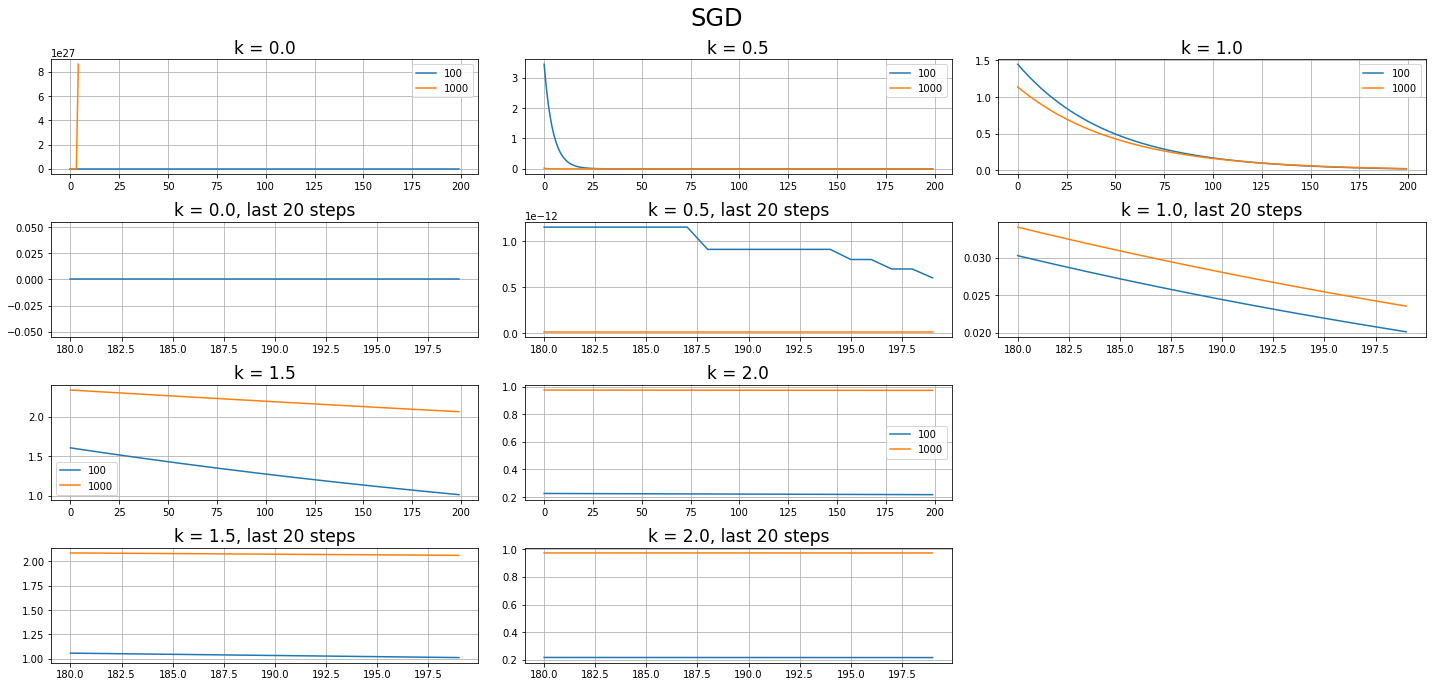

In [28]:
# testing different k's for SGD
n_sizes = np.array([100,1000])
initialized_nn = init_nn(n_sizes)
K = np.array([0,0.5,1,1.5,2])
x = np.arange(200)
fig = plt.figure(figsize=(20, 10))
fig.suptitle('SGD', fontsize = 24)
j = 1
for k in K:
  STR = "k = " + str(k)
  STR_zoom = "k = " + str(k) + ", last 20 steps"
  if j == 4:
    j = 7
  ax1 = fig.add_subplot(4,3,j)
  ax1.grid()
  ax2 = fig.add_subplot(4,3,j+3)
  ax2.grid()
  for net in initialized_nn:
    loss_i = single_k_test(net, k, 'SGD')
    ax1.plot(x, loss_i, label = net.n)
    ax2.plot(x[180:], loss_i[180:])
  ax1.set_title(STR, fontsize=17)
  ax2.set_title(STR_zoom, fontsize=17)
  ax1.legend()
  j += 1

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

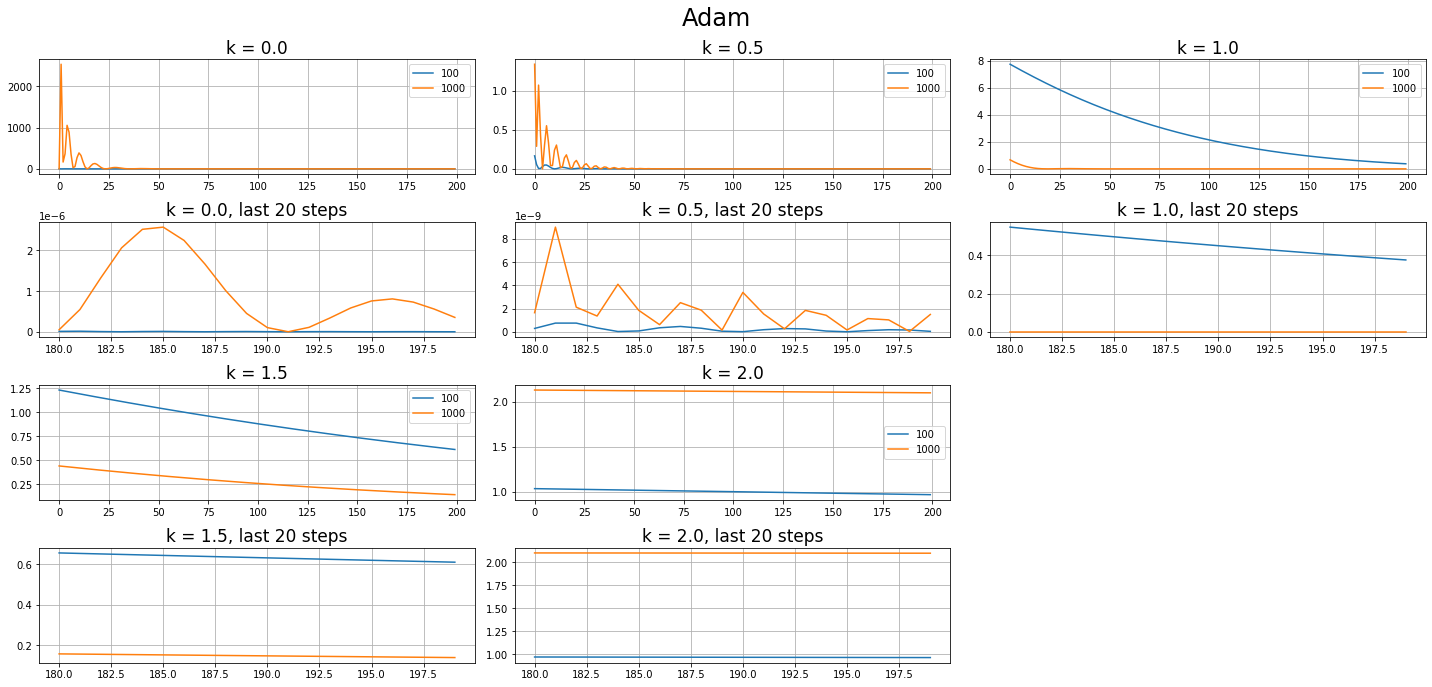

In [27]:
# testing different k's for SGD
n_sizes = np.array([100,1000])
initialized_nn = init_nn(n_sizes)
K = np.array([0,0.5,1,1.5,2])
x = np.arange(200)
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Adam', fontsize = 24)
j = 1
for k in K:
  STR = "k = " + str(k)
  STR_zoom = "k = " + str(k) + ", last 20 steps"
  if j == 4:
    j = 7
  ax1 = fig.add_subplot(4,3,j)
  ax1.grid()
  ax2 = fig.add_subplot(4,3,j+3)
  ax2.grid()
  for net in initialized_nn:
    loss_i = single_k_test(net, k, 'Adam')
    ax1.plot(x, loss_i, label = net.n)
    ax2.plot(x[180:], loss_i[180:])
  ax1.set_title(STR, fontsize=17)
  ax2.set_title(STR_zoom, fontsize=17)
  ax1.legend()
  j += 1

fig.tight_layout(rect=[0, 0.03, 1, 0.95])